# BE m228 Final Project

### Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

import shap

from ucimlrepo import fetch_ucirepo 


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.3.5 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\Users\schow\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "C:\Users\schow\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\traitlets\config\application.py", line 1075, in launch

AttributeError: _ARRAY_API not found

C:\Users\schow\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Load Dataset

In [12]:
diabetes_data = fetch_ucirepo(id=891)

X = diabetes_data.data.features 
y = diabetes_data.data.targets

In [18]:
df = pd.DataFrame(X, columns=diabetes_data.variables['name'])
df['Diabetes_binary'] = y
df['ID'] = diabetes_data.data.ids
df.head(3)

name,ID,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,0,1,1,1,40,1,0,0,0,...,1,0,5,18,15,1,0,9,4,3
1,1,0,0,0,0,25,1,0,0,1,...,0,1,3,0,0,0,0,7,6,1
2,2,0,1,1,1,28,0,0,0,0,...,1,1,5,30,30,1,0,9,4,8


### Exploratory Data Analysis

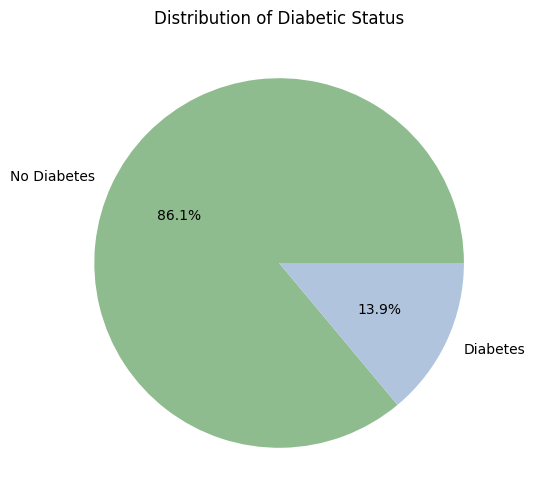

In [25]:
diabetic_counts = df['Diabetes_binary'].value_counts()

plt.figure(figsize=(8, 6))
diabetic_counts.plot(kind='pie', autopct='%1.1f%%', labels=['No Diabetes', 'Diabetes'], colors=['darkseagreen', 'lightsteelblue'])
plt.title('Distribution of Diabetic Status')
plt.ylabel('')
plt.show()

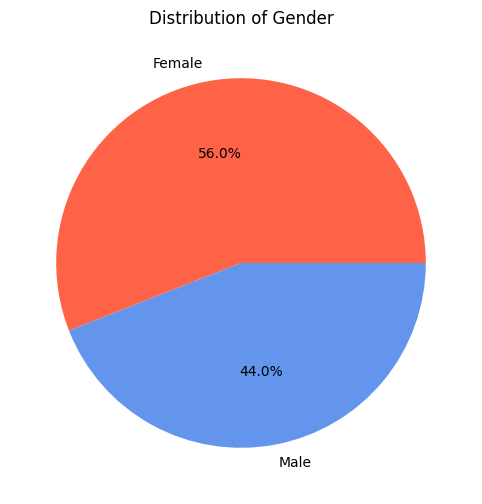

In [24]:
gender_counts = df['Sex'].value_counts()

plt.figure(figsize=(8, 6))
gender_counts.plot(kind='pie', autopct='%1.1f%%', labels=['Female', 'Male'], colors=['tomato', 'cornflowerblue'])
plt.title('Distribution of Gender')
plt.ylabel('')
plt.show()

### Random Forest Model

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestClassifier(n_estimators=200, max_depth=3, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

C:\Users\schow\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:1336: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


              precision    recall  f1-score   support

           0       0.86      1.00      0.93     43739
           1       0.00      0.00      0.00      6997

    accuracy                           0.86     50736
   macro avg       0.43      0.50      0.46     50736
weighted avg       0.74      0.86      0.80     50736



C:\Users\schow\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\schow\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\schow\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_clas

In [20]:
# confusion matrix - diagonal elements represent correct classifications, off-diagonal elements represent misclassifications
print(confusion_matrix(y_test, y_pred))

[[43739     0]
 [ 6997     0]]


Feature Importance

In [21]:
importances = pd.Series(model.feature_importances_, index=X.columns)
print(importances.sort_values(ascending=False))

HighBP                  0.256622
GenHlth                 0.225771
BMI                     0.120988
DiffWalk                0.117723
HighChol                0.099023
Age                     0.046016
HeartDiseaseorAttack    0.043602
PhysHlth                0.032703
Income                  0.022018
PhysActivity            0.015708
Stroke                  0.009593
Education               0.005049
CholCheck               0.002040
HvyAlcoholConsump       0.001573
MentHlth                0.000712
Smoker                  0.000333
Sex                     0.000247
Veggies                 0.000219
AnyHealthcare           0.000058
NoDocbcCost             0.000004
Fruits                  0.000000
dtype: float64


In [ ]:
# AUC score 
roc_auc_score(y_test, model.predict_proba(X_test), multi_class="ovr")

In [ ]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)
shap.summary_plot(shap_values, X)